In [2]:
import sklearn
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

calhouse = sklearn.datasets.fetch_california_housing()
dfx = pd.DataFrame(calhouse.data, columns = calhouse.feature_names)
dfy = pd.DataFrame(calhouse.target, columns=['y'])
df = pd.concat([dfx, dfy],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   y           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'y'],
      dtype='object')

In [5]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
y,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [6]:
model=sm.OLS.from_formula('y~MedInc+AveRooms',data=df)
model_res = model.fit()
model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9502.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:28:37   Log-Likelihood:                -25505.
No. Observations:               20640   AIC:                         5.102e+04
Df Residuals:                   20637   BIC:                         5.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5950      0.016     36.836      0.000       0.563       0.627
MedInc         0.4342      0.003    134.497      0.000       0.428       0.440
AveRooms      -0.0381      0.002    -15.375      0.000      -0.043      -0.033
==============================================================================
Omnibus:                     4804.179   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12852.863
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                       5.949   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

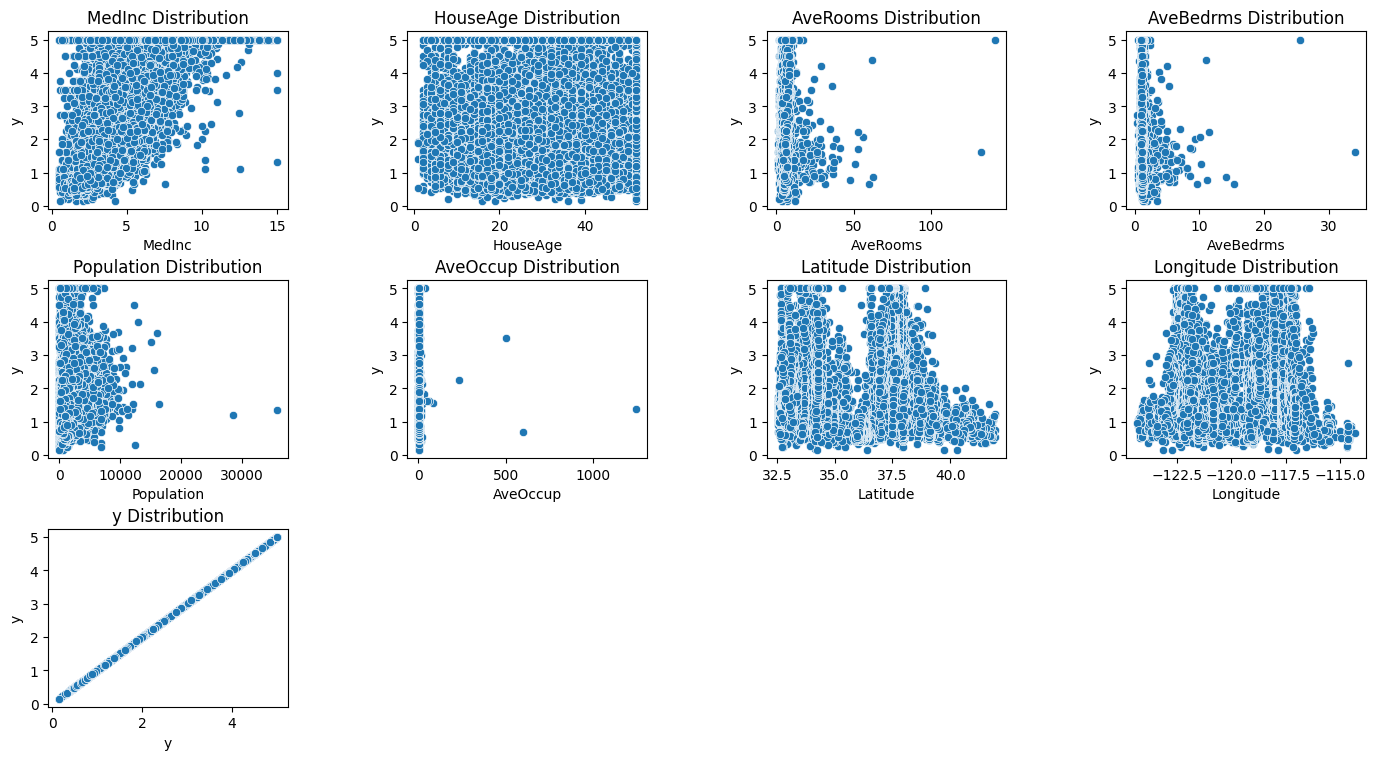

In [7]:
grid = gridspec.GridSpec(4,4)
plt.figure(figsize=(17,12))
plt.subplots_adjust(wspace= 0.5, hspace=0.4)

cal_feature =df.columns

for idx, feature in enumerate(cal_feature):
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x = feature,
                   y='y',
                   data = df,
                   ax = ax)
    ax.set_title(f'{feature} Distribution')

<Axes: >

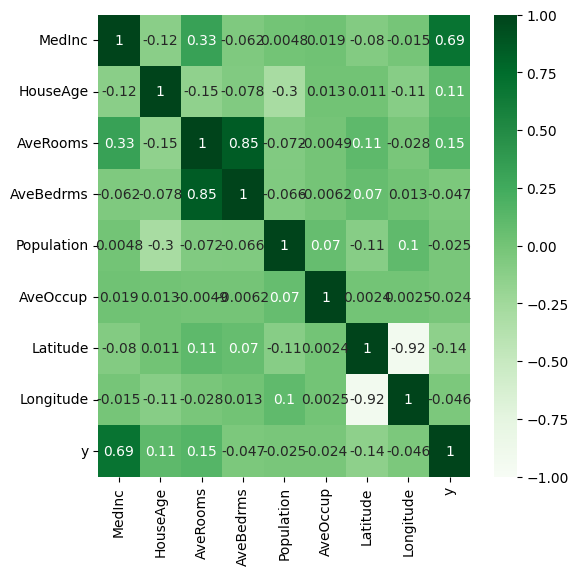

In [8]:
plt.rcParams['figure.figsize'] = (6,6)
sns.heatmap(df.corr(),
           annot=True,
           cmap='Greens',
           vmin = -1, vmax=1)

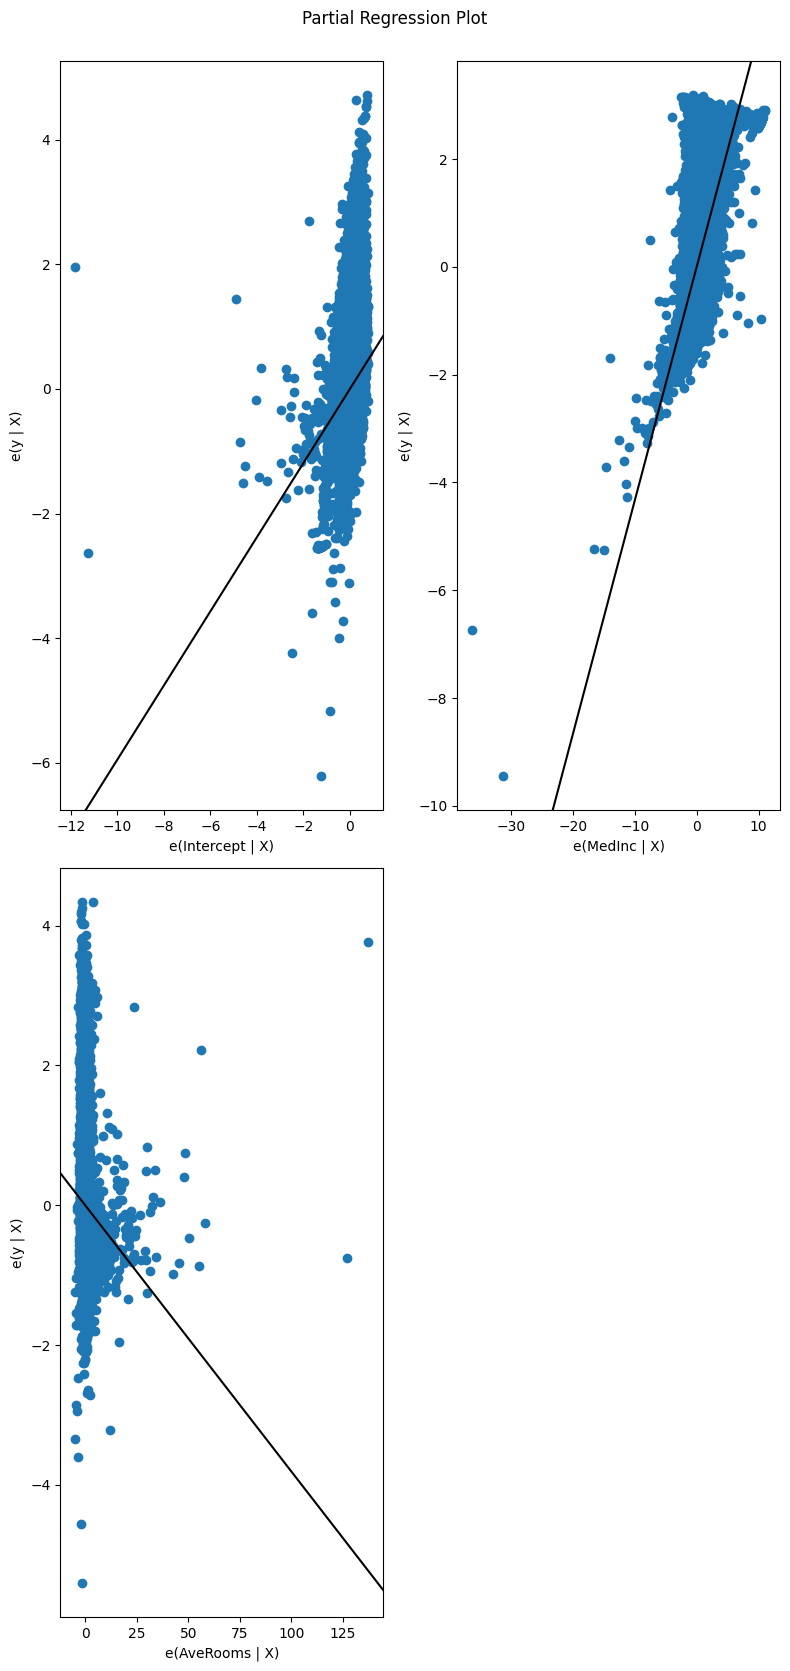

In [9]:
fig = plt.figure(figsize=(8,17))
sm.graphics.plot_partregress_grid(model_res, fig=fig)
plt.show()


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'y'}>]], dtype=object)

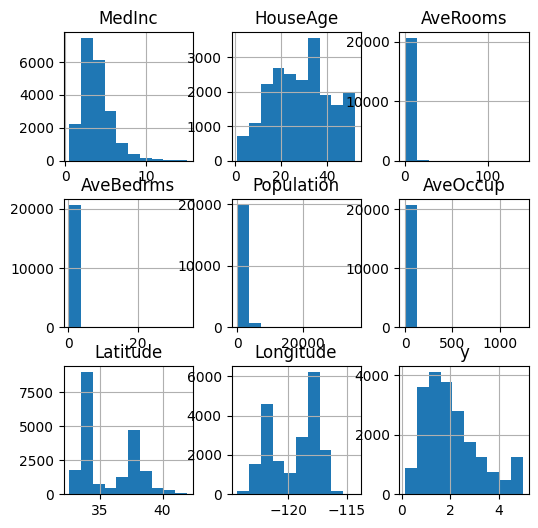

In [10]:
df.hist()

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'y'}>]], dtype=object)

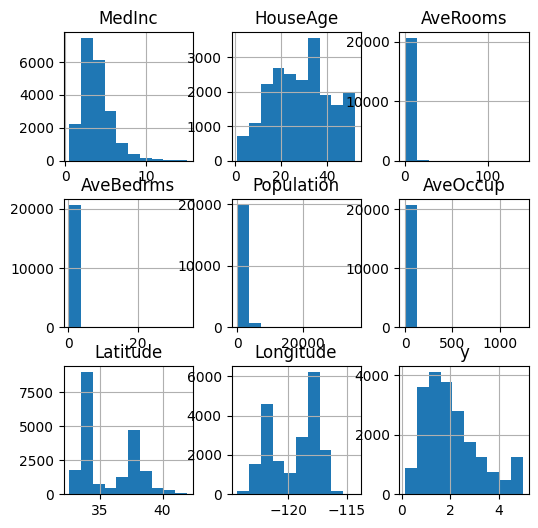

In [11]:
df.hist()

In [12]:
model=sm.OLS.from_formula('y~MedInc+HouseAge+AveRooms',data=df)
model_res = model.fit()
model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7220.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:28:41   Log-Likelihood:                -24836.
No. Observations:               20640   AIC:                         4.968e+04
Df Residuals:                   20636   BIC:                         4.971e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0204      0.022      0.928      0.353      -0.023       0.063
MedInc         0.4428      0.003    141.292      0.000       0.437       0.449
HouseAge       0.0168      0.000     37.185      0.000       0.016       0.018
AveRooms      -0.0272      0.002    -11.231      0.000      -0.032      -0.022
==============================================================================
Omnibus:                     4387.129   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11558.910
Skew:                           1.150   Prob(JB):                         0.00
Kurtosis:                       5.855   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
calhouse = sklearn.datasets.fetch_california_housing()
dfx = pd.DataFrame(calhouse.data, columns = calhouse.feature_names)
dfy = pd.DataFrame(calhouse.target, columns=['y'])
df = pd.concat([dfx, dfy],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()
df_sc =sclaer.fit_transform(df)
df_sc_pd = pd.DataFrame(df_sc, columns = df.columns)
# df['HouseAge'] =sclaer.fit_transform(df[['HouseAge']])
# df['MedInc'] =np.log1p(df['MedInc']) # log변환
# df_sc_pd['Population'] =np.log1p(df_sc_pd['Population']) # log변환
df_sc_pd['AveOccup'] =np.log1p(df_sc_pd['AveOccup']) # log변환
df_sc_pd['AveBedrms'] =np.log1p(df_sc_pd['AveBedrms']) # log변환
df_sc_pd['AveRooms'] =np.log1p(df_sc_pd['AveRooms']) # log변환
df_sc_pd.head()

c:\Users\administ\Desktop\공부\BDA\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,2.344766,0.982143,0.487696,-0.166949,-0.974429,-0.050869,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.282952,-0.305623,0.861439,-0.097075,1.043185,-1.322844,1.314156
2,1.782699,1.856182,0.768079,-0.050258,-0.820777,-0.026182,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.145801,-0.051117,-0.766028,-0.051640,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.296179,-0.033459,-0.759847,-0.089504,1.038503,-1.337818,1.172900


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'y'}>]], dtype=object)

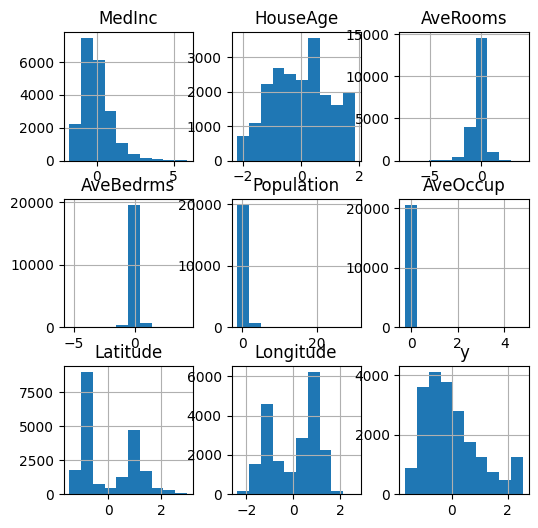

In [15]:
df_sc_pd.hist()

In [16]:
model=sm.OLS.from_formula('y~MedInc+HouseAge+AveRooms+AveBedrms+AveOccup+Latitude+Longitude',data=df_sc_pd)
model_res = model.fit()
model_res.summary() # 조금 오름 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     5541.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:28:42   Log-Likelihood:                -17892.
No. Observations:               20207   AIC:                         3.580e+04
Df Residuals:                   20199   BIC:                         3.586e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0344      0.004     -7.690      0.000      -0.043      -0.026
MedInc         0.7210      0.006    124.888      0.000       0.710       0.732
HouseAge       0.1176      0.004     26.830      0.000       0.109       0.126
AveRooms      -0.1738      0.009    -20.119      0.000      -0.191      -0.157
AveBedrms      0.4683      0.016     29.523      0.000       0.437       0.499
AveOccup      -1.7495      0.043    -41.016      0.000      -1.833      -1.666
Latitude      -0.7777      0.013    -62.045      0.000      -0.802      -0.753
Longitude     -0.7358      0.012    -59.695      0.000      -0.760      -0.712
==============================================================================
Omnibus:                     5563.311   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31721.071
Skew:                           1.204   Prob(JB):                         0.00
Kurtosis:                       8.646   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model=sm.OLS.from_formula('y~MedInc*HouseAge*AveRooms*AveBedrms*AveOccup*Latitude*Longitude',data=df_sc_pd)
model_res = model.fit()
model_res.summary() # 변수 만을수록 높으니 많이 만들어버림

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     412.2
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:30:27   Log-Likelihood:                -15759.
No. Observations:               20207   AIC:                         3.177e+04
Df Residuals:                   20079   BIC:                         3.279e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -0.0794      0.013     -6.162      0.000      -0.105      -0.054
MedInc                                                             0.6988      0.016     43.599      0.000       0.667       0.730
HouseAge                                                           0.1157      0.013      9.209      0.000       0.091       0.140
MedInc:HouseAge                                                    0.0456      0.016      2.858      0.004       0.014       0.077
AveRooms                                                          -0.1474      0.028     -5.337      0.000      -0.202      -0.093
MedInc:AveRooms                                                    0.0222      0.022      1.024      0.306      -0.020       0.065
HouseAge:AveRooms                                                  0.0196      0.027      0.714      0.475      -0.034       0.073
MedInc:HouseAge:AveRooms                                          -0.0546      0.021     -2.653      0.008      -0.095      -0.014
AveBedrms                                                          0.4283      0.044      9.651      0.000       0.341       0.515
MedInc:AveBedrms                                                   0.0812      0.045      1.798      0.072      -0.007       0.170
HouseAge:AveBedrms                                                -0.0999      0.044     -2.275      0.023      -0.186      -0.014
MedInc:HouseAge:AveBedrms                                         -0.0231      0.043     -0.532      0.594      -0.108       0.062
AveRooms:AveBedrms                                                -0.2272      0.039     -5.871      0.000      -0.303      -0.151
MedInc:AveRooms:AveBedrms                                         -0.2123      0.039     -5.419      0.000      -0.289      -0.135
HouseAge:AveRooms:AveBedrms                                       -0.1147      0.038     -3.026      0.002      -0.189      -0.040
MedInc:HouseAge:AveRooms:AveBedrms                                -0.0568      0.041     -1.383      0.167      -0.137       0.024
AveOccup                                                          -2.3825      0.146    -16.268      0.000      -2.670      -2.095
MedInc:AveOccup                                                   -0.2836      0.172     -1.653      0.098      -0.620       0.053
HouseAge:AveOccup                                                 -0.1625      0.135     -1.203      0.229      -0.427       0.102
MedInc:HouseAge:AveOccup                                           0.5475      0.164      3.344      0.001       0.227       0.868
AveRooms:AveOccup                                                  2.4